# Análisis y Modelado Predictivo de Series de Tiempo Aplicado a Precios Históricos

## Introducción:

Este proyecto tiene como objetivo principal realizar un análisis exhaustivo de series de tiempo basado en datos históricos de precios del oro diarios y anuales comprendidos entre 1985 y 2022. Se llevará a cabo un análisis inicial de los datos para identificar patrones importantes, como estacionalidades y tendencias, que nos permitirán entender mejor el comportamiento de los mismos.

Posteriormente, se aplicarán modelos predictivos estadísticos tradicionales, como benchmarks, para comparar su rendimiento con un modelo personalizado, diseñado con el propósito de mejorar la precisión de las predicciones mediante el uso de nuevas estrategias. Este enfoque se centrará en usar técnicas como **Holt-Winters**, **ARIMA**, y redes neuronales básicas, que servirán de referencia para evaluar la eficacia del modelo original propuesto. La meta final es crear un modelo que no solo capture los patrones de la serie de tiempo y sus complejidades, sino que también sea más eficiente y preciso que los métodos tradicionales.

### Metodología:
1. **Exploración de Datos (EDA)**:
   Se realizará un análisis exploratorio para identificar comportamientos generales de la serie de tiempo, analizando la tendencia, estacionalidad, y autocorrelación. Se utilizarán gráficos de líneas, ACF y PACF para entender mejor la estructura de los datos.

2. **Modelos Benchmark**:
   - **Suavizado Exponencial**: Utilizado para predecir valores basados en la tendencia a corto plazo.
   - **Holt-Winters**: Modelo que considera la tendencia y estacionalidad de los datos.
   - **ARIMA**: Modelo estadístico que combina autoregresión y medias móviles, apropiado para series estacionarias.
   - **ANNs**: Redes neuronales artificiales aplicadas para predecir el comportamiento de la serie.

3. **Modelo Personalizado**:
   TBA


## EDA 

##### Análisis Exploratorio de Datos (EDA)

En esta sección se realizara un análisis exploratorio del dataset **Gold Rates 1985-Jan 2022** el cual incluye dos bases,una con registros diarios de los precios del oro desde 1985 hasta febrero de 2022 y otra con promedios anuales de 1978 a 2021. Se exploraran las características de ambas, visualizando las tendencias, estacionalidades y fluctuaciones en los precios a lo largo del tiempo y se realizara un análisis estadístico para comprender mejor la estructura de los datos antes de comenzar a aplicar los modelos predictivos.



#### Carga y Descripción de los Datos

In [1]:
import pandas as pd

# Cargar el dataset diario y anual
daily_data = pd.read_csv('daily_gold_rate.csv', parse_dates=['Date'])
annual_data = pd.read_csv('annual_gold_rate.csv')

# Información sobre los datos diarios
print("Datos Diarios:")
print(daily_data.info())
print(daily_data.head())

# Información sobre los datos anuales
print("\nDatos Anuales:")
print(annual_data.info())
print(annual_data.head())


Datos Diarios:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10114 entries, 0 to 10113
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    10114 non-null  datetime64[ns]
 1   USD     10114 non-null  float64       
 2   EUR     10114 non-null  float64       
 3   GBP     10114 non-null  float64       
 4   INR     10114 non-null  float64       
 5   AED     10114 non-null  float64       
 6   CNY     10110 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 553.2 KB
None
        Date     USD     EUR     GBP      INR      AED    CNY
0 1985-01-01  308.30  402.45  266.01  3825.85  1134.42    NaN
1 1985-01-02  305.50  401.49  266.00  3787.05  1134.42    NaN
2 1985-01-03  302.30  397.08  262.76  3718.88  1107.67    NaN
3 1985-01-04  303.15  397.15  262.58  3759.64  1118.21    NaN
4 1985-01-07  298.25  392.55  261.17  3741.23  1091.58  835.8

Datos Anuales:
<class 'pandas.core.frame.D

### Descripción de los Datos

- **annual_gold_rate.csv**: Este dataset contiene los precios anuales del oro desde 1980 hasta 2022, expresados las siguientes divisas USD, EUR, GBP, INR, AED, y CNY. Cada fila representa el precio de cierre el último día de cada año. 
  - **Observaciones**: Aunque útil para análisis macroeconómicos, este dataset tiene un total de 43 registros, lo que innicialmente parece limitar su aplicabilidad para modelos predictivos de series de tiempo a corto plazo. 
  - **Valores Faltantes**: Hay algunos valores faltantes en la columna **CNY** (5 valores faltantes).

- **daily_gold_rate.csv**: Este dataset registra los precios diarios del oro desde 1985 hasta 2022, proporcionando detalles sobre las fluctuaciones diarias en las mismas divisas mencionadas.
  - **Observaciones**: Contiene 10,114 registros con una gran granularidad que ofrece una representación precisa de las fluctuaciones diarias.Parece ser mas adecuado para análisis de series de tiempo debido a la cantidad de datos disponibles.
  - **Valores Faltantes**: El dataset contiene valores faltantes solo en la columna **CNY** (4 valores faltantes), mientras que las demás divisas tienen datos completos.


## Visualizacion de los Datasets

Debido a la diferencia en magnitudes de los precios del oro en las divisas encontradas en los datasets, se graficarán las series de tiempo con los precios normalizados, además de en sus magnitudes originales.

### Precios Anuales del Oro (1980 - 2022)

/tmp/ipykernel_152493/2678072057.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  scaled_data = scaler.fit_transform(annual_data[['USD', 'EUR', 'GBP', 'INR', 'AED', 'CNY']].fillna(method='ffill'))


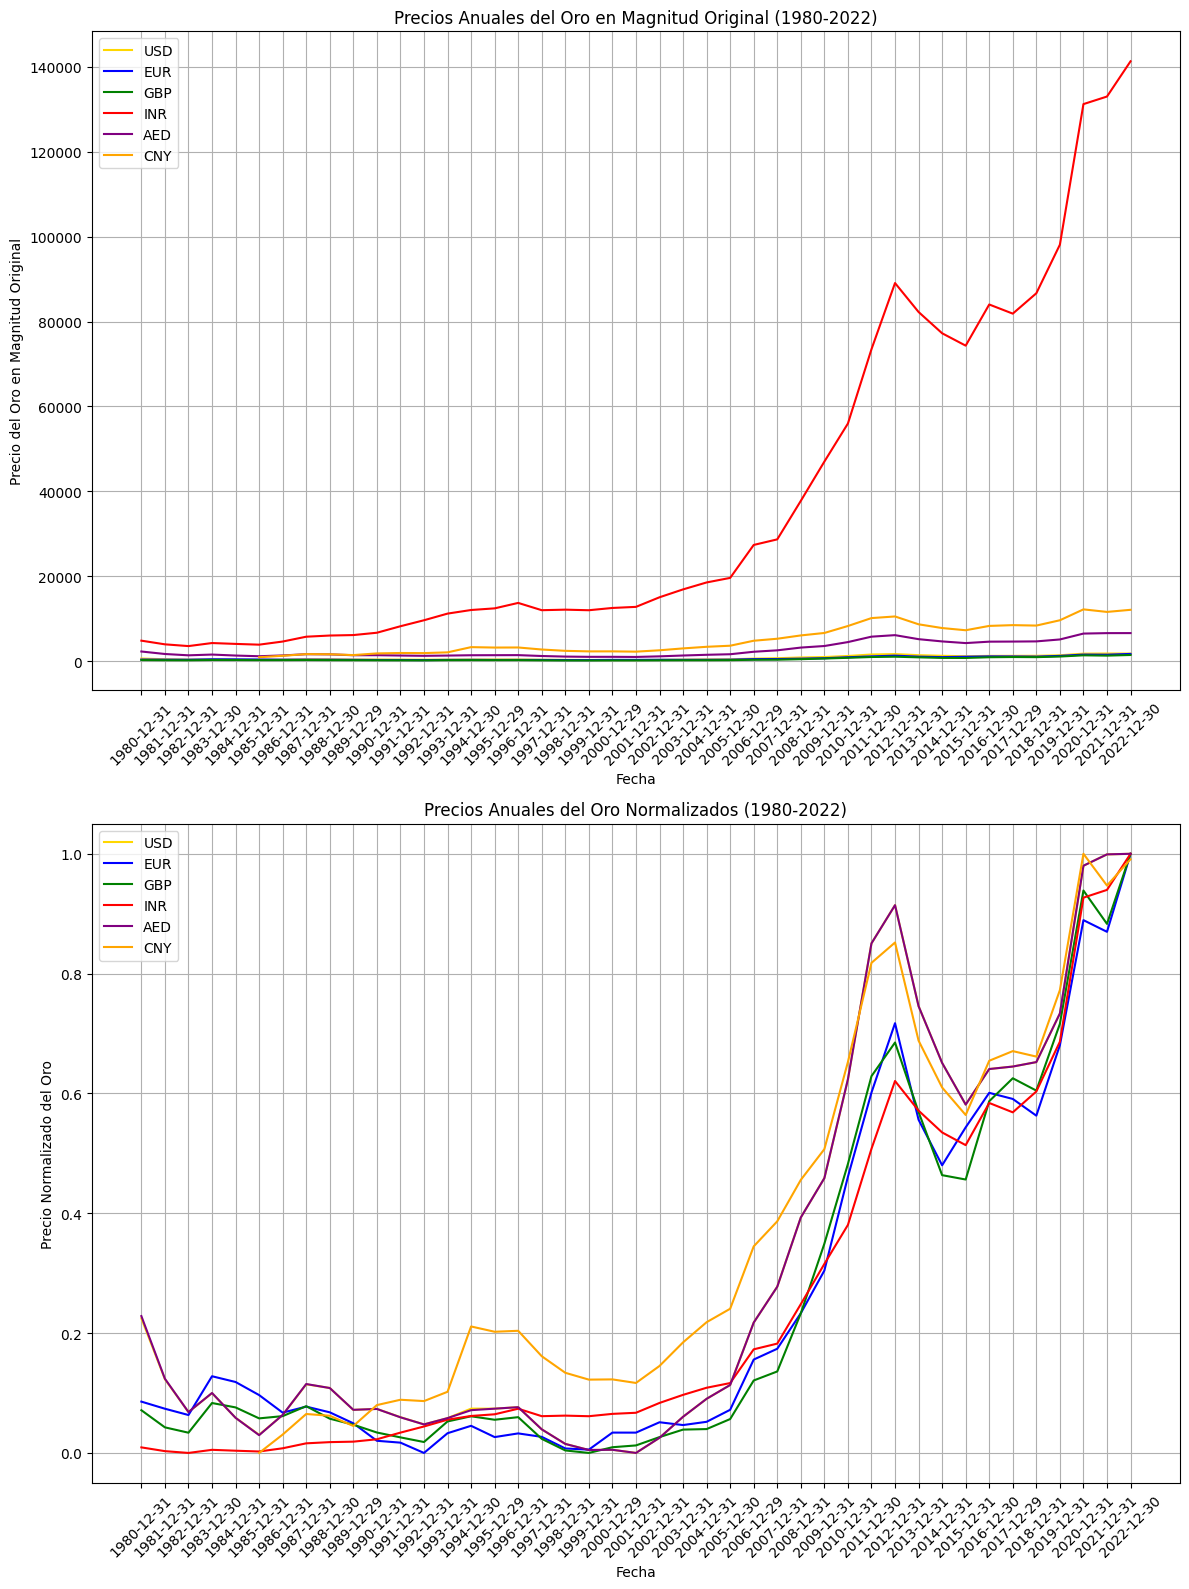

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Normalizar los datos para que todas las divisas estén en la misma escala
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(annual_data[['USD', 'EUR', 'GBP', 'INR', 'AED', 'CNY']].fillna(method='ffill'))
annual_data_scaled = pd.DataFrame(scaled_data, columns=['USD', 'EUR', 'GBP', 'INR', 'AED', 'CNY'])
annual_data_scaled['Date'] = annual_data['Date']

# Crear una figura con dos subgráficos
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16))

# Graficar los precios originales
ax1.plot(annual_data['Date'], annual_data['USD'], label='USD', color='gold')
ax1.plot(annual_data['Date'], annual_data['EUR'], label='EUR', color='blue')
ax1.plot(annual_data['Date'], annual_data['GBP'], label='GBP', color='green')
ax1.plot(annual_data['Date'], annual_data['INR'], label='INR', color='red')
ax1.plot(annual_data['Date'], annual_data['AED'], label='AED', color='purple')
ax1.plot(annual_data['Date'], annual_data['CNY'], label='CNY', color='orange')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Precio del Oro en Magnitud Original')
ax1.legend(loc='upper left')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True)
ax1.set_title('Precios Anuales del Oro en Magnitud Original (1980-2022)')

# Graficar los precios normalizados
ax2.plot(annual_data_scaled['Date'], annual_data_scaled['USD'], label='USD', color='gold')
ax2.plot(annual_data_scaled['Date'], annual_data_scaled['EUR'], label='EUR', color='blue')
ax2.plot(annual_data_scaled['Date'], annual_data_scaled['GBP'], label='GBP', color='green')
ax2.plot(annual_data_scaled['Date'], annual_data_scaled['INR'], label='INR', color='red')
ax2.plot(annual_data_scaled['Date'], annual_data_scaled['AED'], label='AED', color='purple')
ax2.plot(annual_data_scaled['Date'], annual_data_scaled['CNY'], label='CNY', color='orange')
ax2.set_xlabel('Fecha')
ax2.set_ylabel('Precio Normalizado del Oro')
ax2.legend(loc='upper left')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True)
ax2.set_title('Precios Anuales del Oro Normalizados (1980-2022)')

plt.tight_layout()
plt.show()



### Precios Diarios del Oro (1980 - 2022)


/tmp/ipykernel_152493/4216051286.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  scaled_data = scaler.fit_transform(daily_data[['USD', 'EUR', 'GBP', 'INR', 'AED', 'CNY']].fillna(method='ffill'))


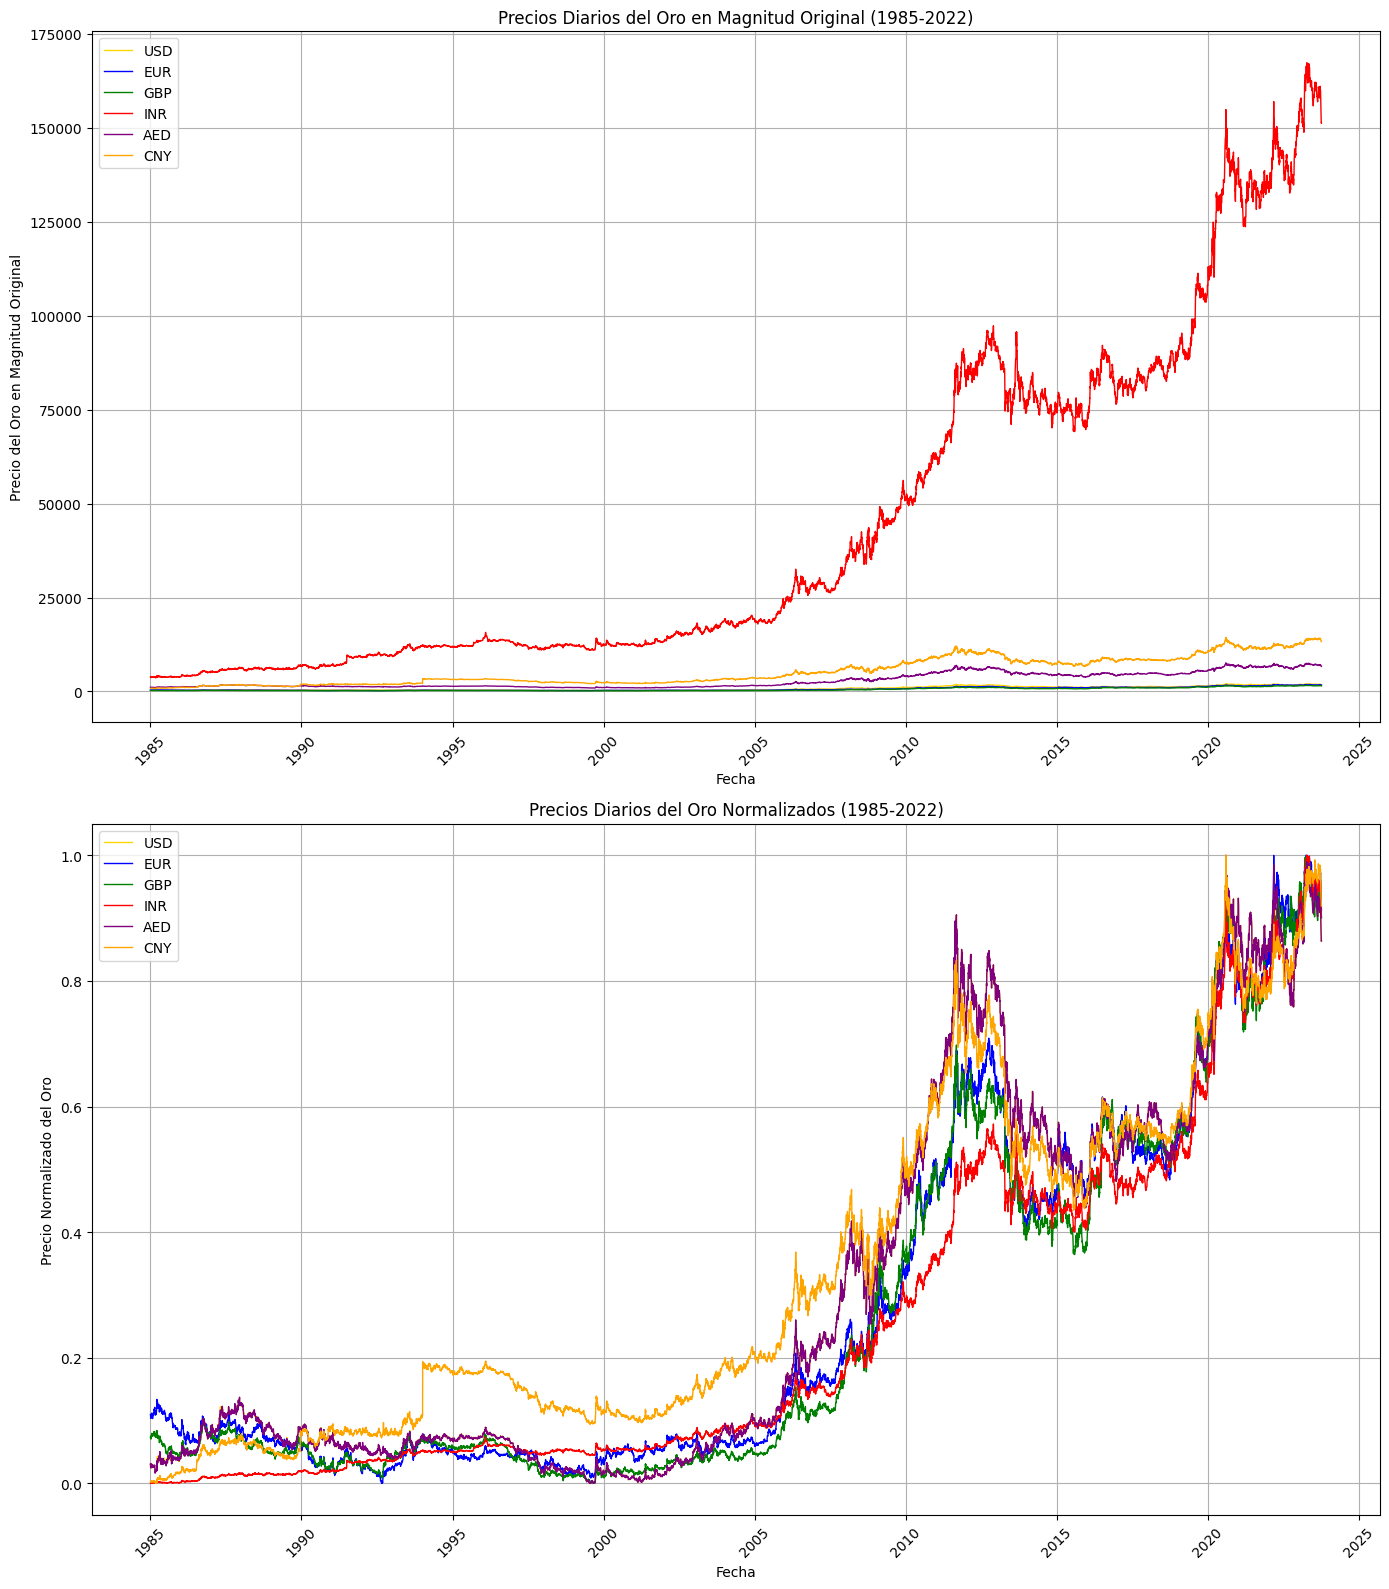

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Normalizar los datos para que todas las divisas estén en la misma escala
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(daily_data[['USD', 'EUR', 'GBP', 'INR', 'AED', 'CNY']].fillna(method='ffill'))
daily_data_scaled = pd.DataFrame(scaled_data, columns=['USD', 'EUR', 'GBP', 'INR', 'AED', 'CNY'])
daily_data_scaled['Date'] = daily_data['Date']

# Crear la figura con dos subgráficos
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 16))

# Graficar los precios originales
ax1.plot(daily_data['Date'], daily_data['USD'], label='USD', color='gold', linewidth=1)
ax1.plot(daily_data['Date'], daily_data['EUR'], label='EUR', color='blue', linewidth=1)
ax1.plot(daily_data['Date'], daily_data['GBP'], label='GBP', color='green', linewidth=1)
ax1.plot(daily_data['Date'], daily_data['INR'], label='INR', color='red', linewidth=1)
ax1.plot(daily_data['Date'], daily_data['AED'], label='AED', color='purple', linewidth=1)
ax1.plot(daily_data['Date'], daily_data['CNY'], label='CNY', color='orange', linewidth=1)
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Precio del Oro en Magnitud Original')
ax1.legend(loc='upper left')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True)
ax1.set_title('Precios Diarios del Oro en Magnitud Original (1985-2022)')

# Graficar los precios normalizados
ax2.plot(daily_data_scaled['Date'], daily_data_scaled['USD'], label='USD', color='gold', linewidth=1)
ax2.plot(daily_data_scaled['Date'], daily_data_scaled['EUR'], label='EUR', color='blue', linewidth=1)
ax2.plot(daily_data_scaled['Date'], daily_data_scaled['GBP'], label='GBP', color='green', linewidth=1)
ax2.plot(daily_data_scaled['Date'], daily_data_scaled['INR'], label='INR', color='red', linewidth=1)
ax2.plot(daily_data_scaled['Date'], daily_data_scaled['AED'], label='AED', color='purple', linewidth=1)
ax2.plot(daily_data_scaled['Date'], daily_data_scaled['CNY'], label='CNY', color='orange', linewidth=1)
ax2.set_xlabel('Fecha')
ax2.set_ylabel('Precio Normalizado del Oro')
ax2.legend(loc='upper left')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True)
ax2.set_title('Precios Diarios del Oro Normalizados (1985-2022)')

plt.tight_layout()
plt.show()


### Interpretación Gráficas de Precios del Oro (1980 - 2022)

Las gráficas muestran la evolución de los precios del oro en varias divisas (USD, EUR, GBP, INR, AED, y CNY) desde 1980 hasta 2022, con datos anuales y diarios. Se destacan las siguientes tendencias:

- **Tendencia general al alza**: Los precios del oro muestran una tendencia creciente a lo largo del período en todas las monedas representadas, con algunas variaciones.
- **Incremento pronunciado en 2008-2012**: Todas las divisas experimentaron un aumento significativo durante la crisis financiera global, reflejando la búsqueda de seguridad económica en el oro.
- **Diferencias en magnitud de precios**: Los precios en **INR** tienen una escala mucho mayor que en otras monedas, al igual que **AED** y **CNY**, lo cual refleja tanto la diferencia en el valor relativo de las divisas debido a la inflación en países como India y China. Estas diferencias en magnitud hacen que los precios de estas divisas sean difíciles de comparar directamente con **USD**, **EUR**, y **GBP**. Debido a estas grandes diferencias en magnitudes, podría ser adecuado reducir la cantidad de divisas estudiadas en el modelo, ya que inicialmente parecen presentar tendencias muy similares, y estas diferencias de magnitud podrían dificultar la creación de los modelos o afectar su precisión.
- **Caída y recuperación en 2013-2020**: Hubo una ligera disminución de los precios después de 2012, seguida por una recuperación en 2020, coincidiendo con la pandemia y el aumento de la incertidumbre causada por la paralización de varios sectores económicos.



### Reduccion a una unica base

Despues de observar inicialmente estos datasets se llego a la conclusion de que enfocar el estudio en las base de precios diaros.La reducción a una única base se justifica debido a la limitada cantidad de entradas econtradas en el datset de precios anuales del oro, que contiene solo 43 registros. Este tamaño de muestra no es adecuado para el entrenamiento de los modelos que se planean implementar, ya que la falta de datos limita la capacidad de los modelo para aprender patrones complejos y generalizar correctamente.Ademas de que las tendencias y estacionalidad se presenta de la misma manera en los dos datasets por lo se espera que la base de precios diarios que ofrece una mayor cantidad de entradas sera mas adecuada para entrenar modelos robustos y precisos.


## Difrenciacion de las variables y analisis de tendecia

### Matriz de Correlación entre las Divisas (1985-2022)

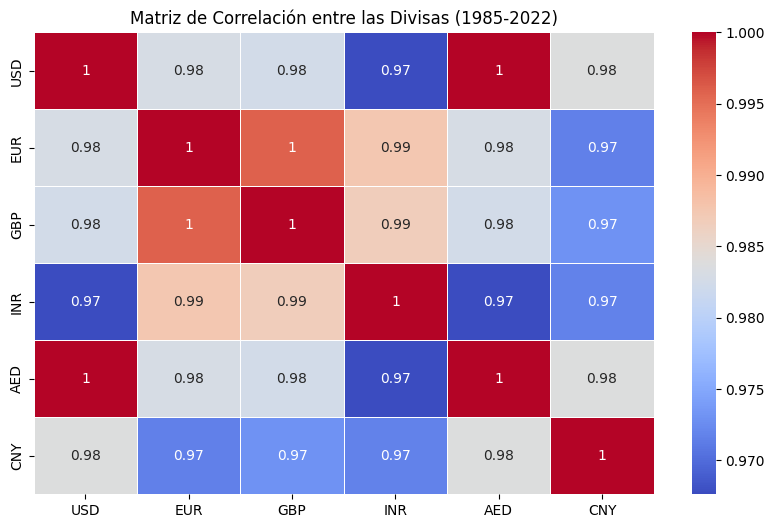

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación entre las monedas
correlation_matrix = daily_data[['USD', 'EUR', 'GBP', 'INR', 'AED', 'CNY']].corr()

# Visualizar la matriz de correlación usando un mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación entre las Divisas (1985-2022)')
plt.show()


### Interpretación de la Matriz de Correlación entre las Divisas (1985-2022)

La matriz de correlación muestra relaciones muy estrechas entre las distintas divisas a lo largo del período analizado:

- **USD**, **EUR**, **GBP**, e **INR** presentan correlaciones extremadamente altas, todas superiores a **0.97**. Esto indica que las fluctuaciones en los precios del oro en estas monedas siguen patrones muy similares.
- **AED** y **CNY** también muestran correlaciones muy altas con **USD** y **EUR** , con coeficientes que se asemejan o representan a una correlacion positiva perfecta **0.97-1.0**.

Estas correlaciones tan altas indican que incluir todas las monedas en el modelo podría introducir **redundancia** en el análisis, ya que varias de las divisas se mueven de manera casi idéntica. Esta información justifica la reducción a trabajar únicamente con **USD** y **EUR**, ya que estas divisas son suficientemente representativas del comportamiento general del precio del oro, sin perder información significativa. Además, la reducción podría simplificar el modelo y mejorar su **eficiencia** sin comprometer la **precisión** en la predicción de los precios.


## Análisis del Coeficiente de Variación y Componentes Principales

Para verificar si es correcta una **reducción en el número de divisas consideradas en el análisis**,se realizar un **análisis de los coeficientes de variación** y aplicar el **PCA**. Esto permitirá determinar si realmente existe una diferencia significativa entre analizar todas las divisas o un subconjunto de ellas y si esta reducción afectará significativamente al los modelos.


Coeficiente de Variación (CV) para cada divisa:
USD    0.681454
EUR    0.691313
GBP    0.773009
INR    0.992150
AED    0.681540
CNY    0.689569
dtype: float64

Porcentaje de varianza explicada por cada componente principal:
Componente Principal 1: 98.45%
Componente Principal 2: 0.89%
Componente Principal 3: 0.47%
Componente Principal 4: 0.13%
Componente Principal 5: 0.06%
Componente Principal 6: 0.00%

Pesos (Loadings) de cada divisa en los Componentes Principales:
        USD       EUR       GBP       INR       AED       CNY
0  0.408954  0.409236  0.409209  0.406475  0.408954  0.406651
1 -0.422031  0.319681  0.307933  0.568690 -0.422185 -0.351030
2 -0.267871 -0.308795 -0.267071  0.377805 -0.267139  0.739908
3  0.278025 -0.205069 -0.553666  0.589949  0.278215 -0.385563
4 -0.075145  0.770014 -0.599877 -0.143503 -0.075473  0.123653
5 -0.707069  0.000401  0.000106 -0.000247  0.707145 -0.000341


/tmp/ipykernel_152493/3992318955.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  scaled_data = daily_data[['USD', 'EUR', 'GBP', 'INR', 'AED', 'CNY']].fillna(method='ffill')


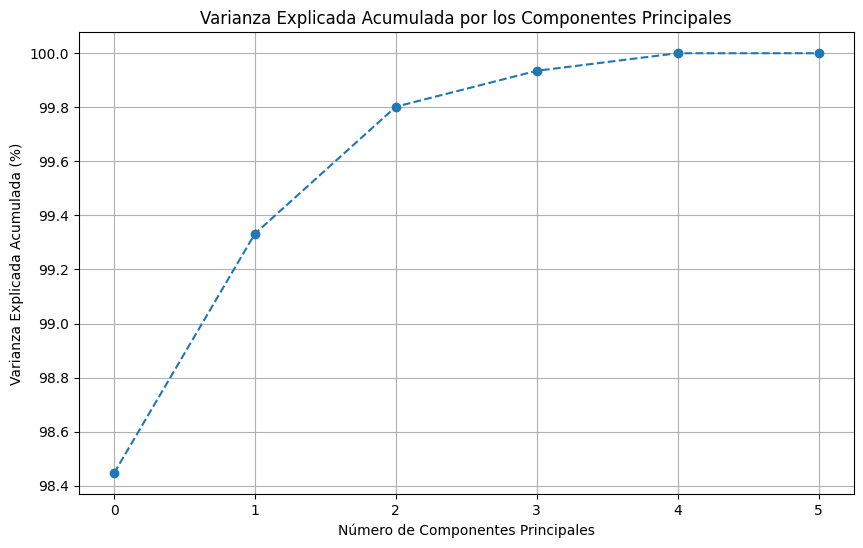

In [5]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Calcular el Coeficiente de Variación (CV) para cada divisa
cv_values = daily_data[['USD', 'EUR', 'GBP', 'INR', 'AED', 'CNY']].std() / daily_data[['USD', 'EUR', 'GBP', 'INR', 'AED', 'CNY']].mean()
print("Coeficiente de Variación (CV) para cada divisa:")
print(cv_values)

# Aplicar Análisis de Componentes Principales (PCA) y Llenar los valores faltantes con el método de forward fill
scaled_data = daily_data[['USD', 'EUR', 'GBP', 'INR', 'AED', 'CNY']].fillna(method='ffill')
scaled_data = scaled_data.dropna()
scaled_data = (scaled_data - scaled_data.mean()) / scaled_data.std()

pca = PCA()
principal_components = pca.fit_transform(scaled_data)

# Explicación de la varianza
explained_variance = pca.explained_variance_ratio_
print("\nPorcentaje de varianza explicada por cada componente principal:")
for i, variance in enumerate(explained_variance):
    print(f"Componente Principal {i+1}: {variance * 100:.2f}%")

# Pesos de cada divisa en los componentes principales
loadings = pca.components_
loadings_df = pd.DataFrame(loadings, columns=['USD', 'EUR', 'GBP', 'INR', 'AED', 'CNY'])
print("\nPesos (Loadings) de cada divisa en los Componentes Principales:")
print(loadings_df)

# Graficar la varianza explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance) * 100, marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada (%)')
plt.title('Varianza Explicada Acumulada por los Componentes Principales')
plt.grid(True)
plt.show()


### Interpretación del Análisis del Coeficiente de Variación (CV) y PCA

#### Coeficiente de Variación (CV)
El **Coeficiente de Variación (CV)** mide la **volatilidad relativa** de cada divisa respecto a su media:
- **INR** tiene el CV más alto (**0.99**), indicando una mayor volatilidad en comparación con las demás divisas.
- **GBP** también presenta un CV relativamente alto (**0.77**), lo cual sugiere cierta volatilidad adicional en comparación con las demás.
- **USD**, **EUR**, **AED**, y **CNY** presentan valores de CV similares (**0.68-0.69**), lo cual indica que estas divisas presentan mayor estabilidad y podrian ser mas adecuadas para los modelos.

#### Varianza Explicada por los Componentes Principales
El **Análisis de Componentes Principales (PCA)** proporciona la varianza explicada por cada componente:
- El **Componente Principal 1 (CP1)** explica el **98.45%** de la varianza total lo que  indica la gran mayoria de la variabilidad de los precios del oro en puede ser capturada por este componente.
- Los **componentes restantes** explican una fracción muy pequeña de la varianza (menos del **2%**),esto indica que su contribución es marginal.

#### Pesos de cada Divisa en los Componentes Principales
Los **pesos** de cada divisa en los componentes principales muestran la contribución de cada una:
- En el **CP1**, los pesos de todas las divisas son muy similares (**0.408-0.409**), lo cual indica que este componente es una **combinación balanceada** de todas las divisas.
- Los **componentes secundarios** tienen pesos más variados, indicando que estas combinaciones lineales capturan variaciones específicas de ciertas divisas pero de debido a su contribución a la varianza total esto no parece ser relevante.

#### Conclusión
El **CP1** explica la gran mayoría de la varianza de los precios del oro y tiene una combinación muy equilibrada de todas las divisas. Esto indica que **reducir el análisis a solo una o dos divisas** sería suficiente para capturar la mayoría de la información relevante, sin perder precisión en el modelo. Los otros componentes tienen un impacto marginal, y los pesos similares entre las divisas en el **CP1** justifican la reducción de las divisas sin pérdida significativa de información.


## Reducción del Número de Divisas en el Modelo

Después de realizar un análisis exhaustivo utilizando **correlación**, **Análisis de Componentes Principales (PCA)**, y evaluar los **pesos (loadings)** de cada divisa en los componentes principales,se justifica la reducción del número de divisas consideradas en el modelo a solo **USD** y **EUR**:

- **Alta Correlación**: Las divisas analizadas (USD, EUR, GBP, INR, AED, CNY) presentan una **correlación extremadamente alta**, lo cual indica que se comportan de manera muy similar. Esto sugiere que incluir todas las divisas introduciría **redundancia** sin añadir información significativa adicional.

- **PCA**: El **Componente Principal 1 (CP1)** explica **98.45%** de la variabilidad total de los datos, y los pesos asociados a este componente son prácticamente iguales para todas las divisas.

- **Pesos Uniformes en el CP1**: Los **pesos** de todas las divisas en el **CP1** son similares, lo cual refuerza la idea de que no hay una divisa que domine la explicación de la variabilidad. Esto permite justificar el uso de **cualquiera de las divisas** para representar el comportamiento del precio del oro.

- **Representatividad del Mercado**: El proyecto por lo tanto se enfocara en **USD** y **EUR**, ya que además de su **alta representatividad** en el mercado mundial, el análisis de estas divisas es el más interesante desde el punto de vista de **Macroeconomico**. Tanto el USD como el EUR tienen un papel crucial en el comercio internacional, lo cual los convierte en indicadores relevantes para los precios del oro.

Por estas razones, se prodera a **reducir el número de divisas** consideradas en el modelo a solo **USD** y **EUR**, lo cual simplificará el análisis sin comprometer la **precisión** de los modelos.


### Visualizacion del Dataset Optimizado

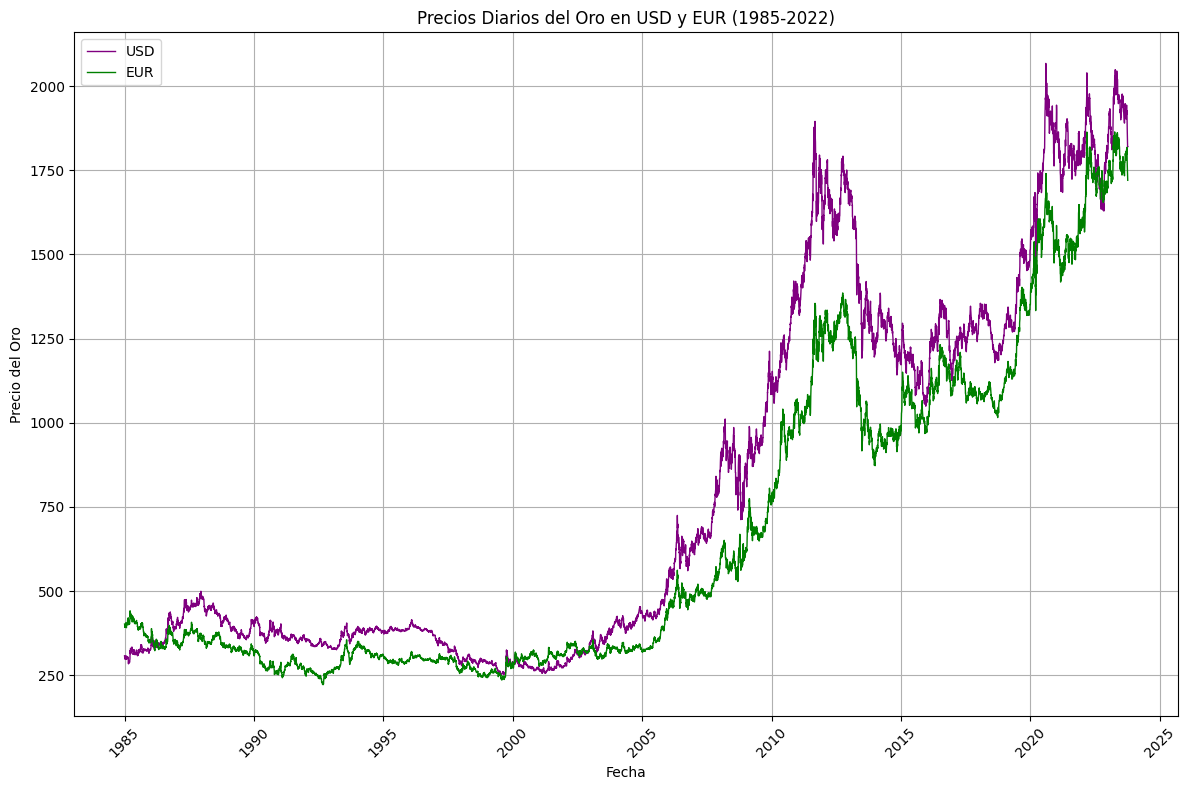

In [6]:
import matplotlib.pyplot as plt

# Graficar la serie de tiempo con la base reducida (USD y EUR)
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar USD y EUR
ax.plot(daily_data['Date'], daily_data['USD'], label='USD', color='purple', linewidth=1)
ax.plot(daily_data['Date'], daily_data['EUR'], label='EUR', color='green', linewidth=1)

# Configurar etiquetas y título
ax.set_xlabel('Fecha')
ax.set_ylabel('Precio del Oro')
ax.set_title('Precios Diarios del Oro en USD y EUR (1985-2022)')
ax.legend(loc='upper left')
ax.tick_params(axis='x', rotation=45)
ax.grid(True)

plt.tight_layout()
plt.show()


## Análisis de Tendencia General y Estacionalidad

Habiendo realizado una depuración y optimización de las base de datos, se procedera a analizar más detalladamente la nueva base. Uno de los primeros pasos que a tomar para identificar factores importantes para la creación de los modelos es descomponer la serie de tiempo en sus componentes de **tendencia**, **estacionalidad**, y **residuo**.

Utilizando el método **STL (Seasonal and Trend decomposition using Loess)** para analizar los precios del oro en **USD** y **EUR**, lo que permitirá identificar la tendencia sostenida y los patrones estacionales presentes en los datos.



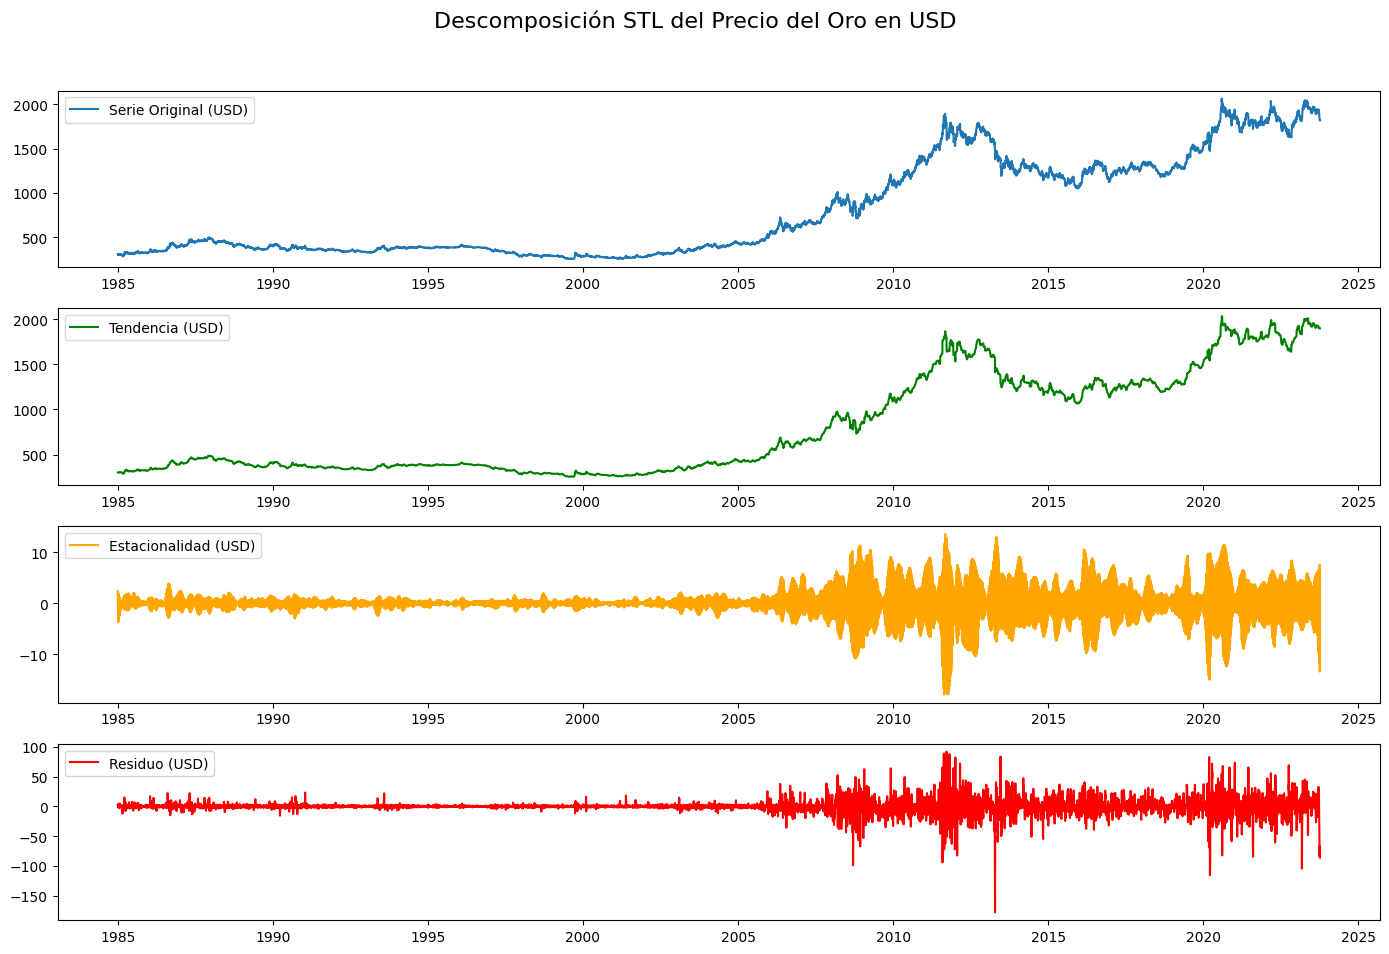

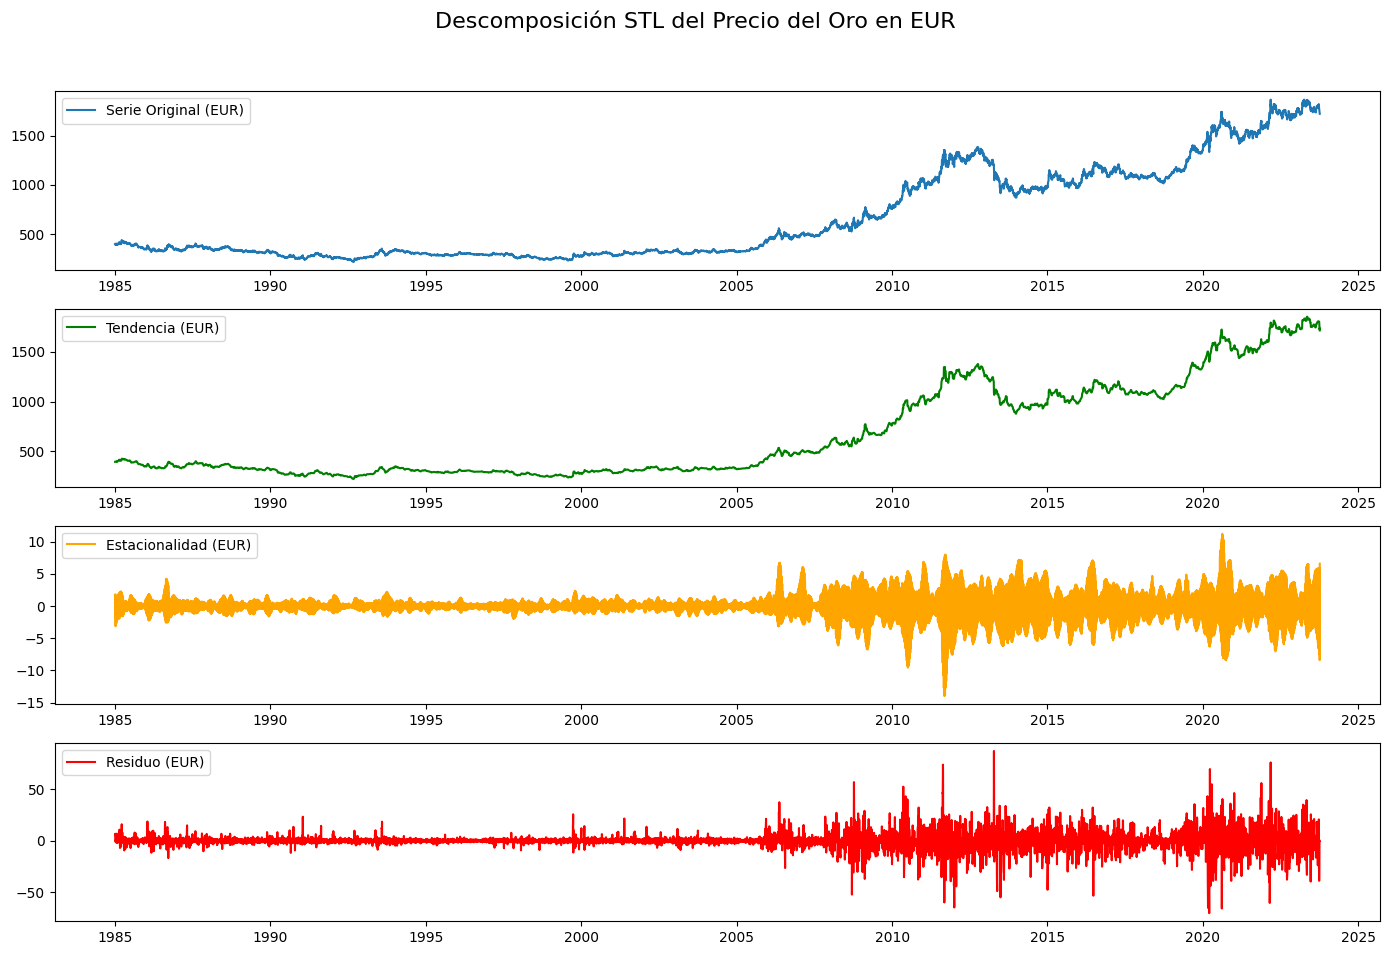

In [7]:
from statsmodels.tsa.seasonal import STL

# Crear una nueva variable para la descomposición
data_stl = daily_data[['Date', 'USD', 'EUR']].dropna()
daily_data_op = daily_data[['Date', 'USD', 'EUR']].dropna()

# Establecer la fecha como índice
data_stl.set_index('Date', inplace=True)

# Aplicar la descomposición STL para USD
stl_usd = STL(data_stl['USD'], seasonal=13, robust=True).fit()

# Aplicar la descomposición STL para EUR
stl_eur = STL(data_stl['EUR'], seasonal=13, robust=True).fit()

# Graficar la descomposición para USD
plt.figure(figsize=(14, 10))
plt.suptitle('Descomposición STL del Precio del Oro en USD', fontsize=16)

plt.subplot(4, 1, 1)
plt.plot(stl_usd.observed, label='Serie Original (USD)')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(stl_usd.trend, label='Tendencia (USD)', color='green')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(stl_usd.seasonal, label='Estacionalidad (USD)', color='orange')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(stl_usd.resid, label='Residuo (USD)', color='red')
plt.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Graficar la descomposición para EUR
plt.figure(figsize=(14, 10))
plt.suptitle('Descomposición STL del Precio del Oro en EUR', fontsize=16)

plt.subplot(4, 1, 1)
plt.plot(stl_eur.observed, label='Serie Original (EUR)')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(stl_eur.trend, label='Tendencia (EUR)', color='green')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(stl_eur.seasonal, label='Estacionalidad (EUR)', color='orange')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(stl_eur.resid, label='Residuo (EUR)', color='red')
plt.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



## Interpretación de la Descomposición STL del Precio del Oro

Después de realizar la descomposición de la serie de tiempo de los precios del oro en **USD** y **EUR** utilizando el método **STL**, se identifican los siguientes componentes clave:

- **Tendencia General**: Como se mencionó en las observaciones iniciales, la **tendencia** muestra un **aumento significativo** a partir del año 2005 en ambas divisas, alcanzando un máximo alrededor de 2011-2012. Esto coincide con el período de crisis financiera global, lo cual sugiere que el oro actuó como **activo refugio** en ese contexto. Posteriormente, se observa una ligera disminución, seguida por una nueva recuperación a partir de 2019-2020, probablemente como respuesta a la incertidumbre generada por la pandemia de COVID-19.

- **Estacionalidad**: La **estacionalidad** presenta fluctuaciones cíclicas que no parecen tener una **amplitud significativa** en comparación con la tendencia. Esto indica que el oro no sigue un patrón estacional claro o recurrente a lo largo de los años, sino que su comportamiento estacional es moderado e influenciado por factores externos no siempre periódicos.

- **Residuo (Componente Aleatorio)**: El componente **residual** refleja un comportamiento más errático, especialmente a partir de 2005, con **picos de volatilidad** que coinciden con eventos económicos significativos, como la crisis de 2008 y la pandemia de 2020. Estos picos en el residuo reflejan la **alta volatilidad** e incertidumbre en estos períodos.

### Conclusiones del Análisis de Descomposición
- **Tendencia Dominante**: El componente de **tendencia** es el más relevante, mostrando un crecimiento constante en el precio del oro y movimientos repentinos que coinciden con momentos de **alta incertidumbre** económica.
- **Estacionalidad Moderada**: La **estacionalidad** tiene un impacto relativamente menor, lo cual implica que el oro no está fuertemente influenciado por patrones cíclicos estacionales.
- **Alta Volatilidad en el Residuo**: Los picos en el **residuo** indican períodos de **alta volatilidad** que no pueden ser explicados por la tendencia o la estacionalidad. Esto es importante al considerar la modelación, ya que estos factores aleatorios representan el impacto de eventos macroeconómicos inesperados.

En resumen, el análisis muestra que el precio del oro está fuertemente influenciado por eventos globales que generan **incertidumbre económica**, con una tendencia clara de crecimiento en momentos críticos y una estacionalidad que, aunque presente, tiene un papel menor.


## Análisis de Autocorrelación y Retardo (ACF y PACF)

Para evaluar la **dependencia temporal** de los precios del oro en se analizaran las funciones de **autocorrelación (ACF)** y **autocorrelación parcial (PACF)**. Estos gráficos nos permitirán identificar patrones repetitivos y determinar la duración de los mismos, lo cual es esencial para la construcción de modelos de predicción como **ARIMA**.

La **ACF** nos permite evaluar cómo los valores de la serie se correlacionan con sus valores pasados, mientras que la **PACF** muestra la correlación directa de un valor con sus rezagos, excluyendo la influencia de los otros rezagos intermedios.


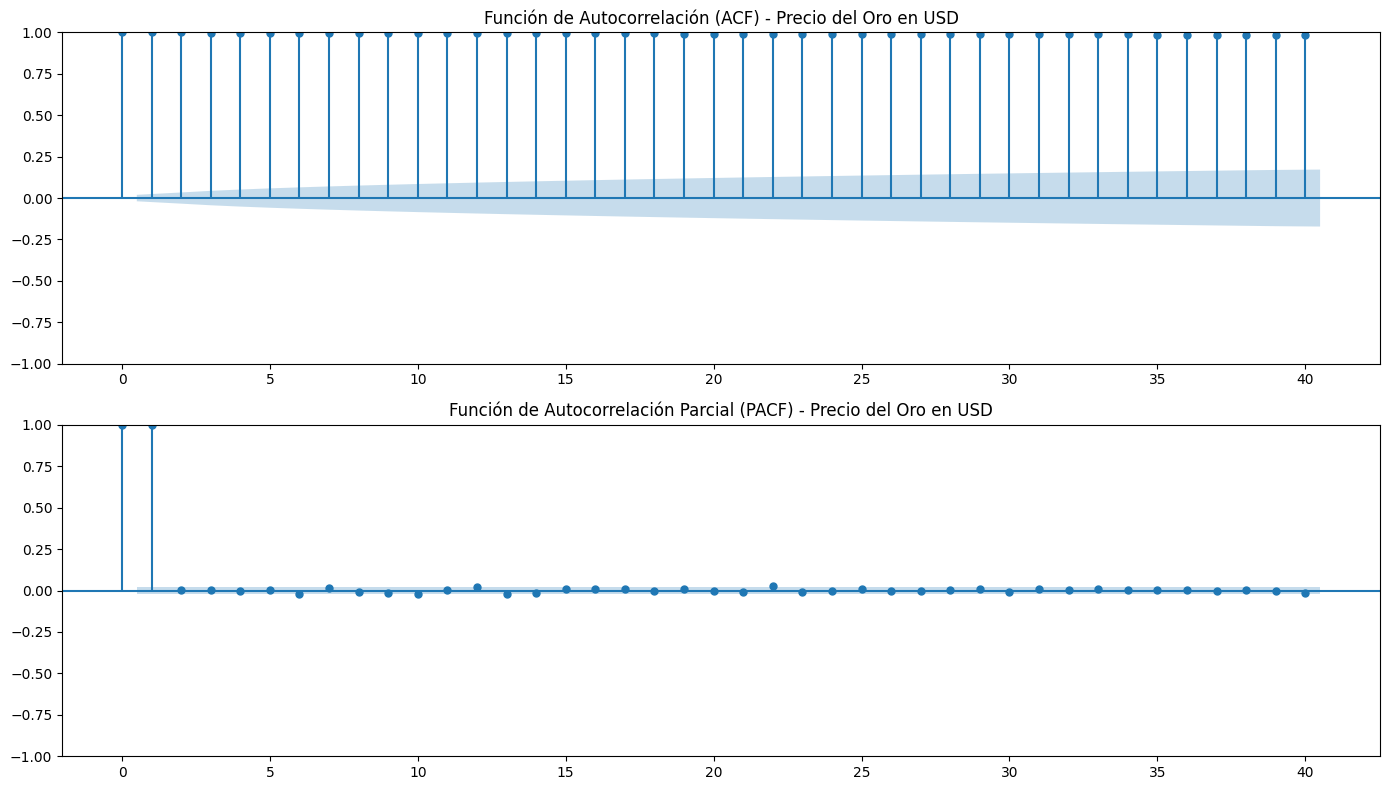

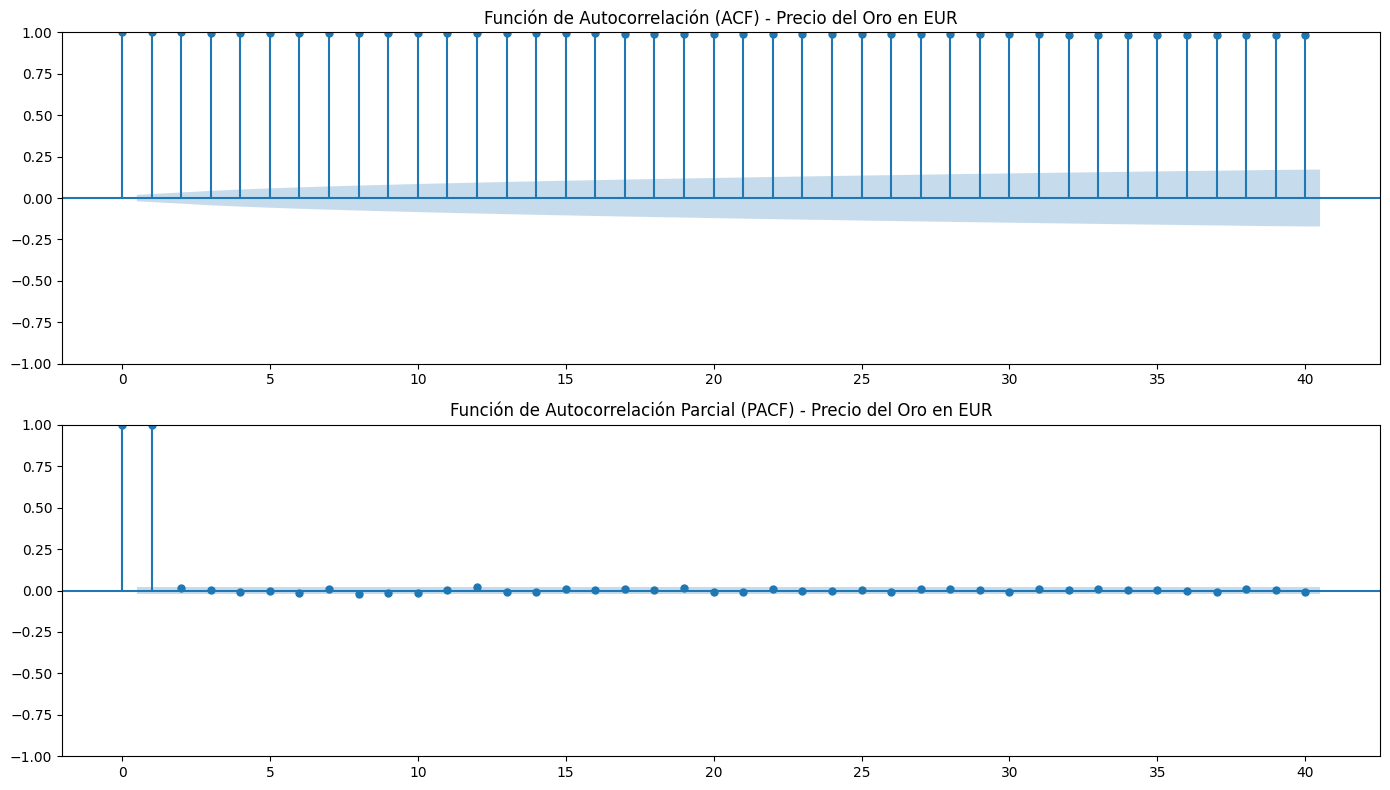

In [8]:
import statsmodels.api as sm

# ACF y PACF para USD
fig, ax = plt.subplots(2, 1, figsize=(14, 8))
sm.graphics.tsa.plot_acf(daily_data_op['USD'], lags=40, ax=ax[0])
sm.graphics.tsa.plot_pacf(daily_data_op['USD'], lags=40, ax=ax[1])
ax[0].set_title('Función de Autocorrelación (ACF) - Precio del Oro en USD')
ax[1].set_title('Función de Autocorrelación Parcial (PACF) - Precio del Oro en USD')
plt.tight_layout()
plt.show()

# ACF y PACF para EUR
fig, ax = plt.subplots(2, 1, figsize=(14, 8))
sm.graphics.tsa.plot_acf(daily_data_op['EUR'], lags=40, ax=ax[0])
sm.graphics.tsa.plot_pacf(daily_data_op['EUR'], lags=40, ax=ax[1])
ax[0].set_title('Función de Autocorrelación (ACF) - Precio del Oro en EUR')
ax[1].set_title('Función de Autocorrelación Parcial (PACF) - Precio del Oro en EUR')
plt.tight_layout()
plt.show()


## Interpretación del Análisis de Autocorrelación (ACF) y Autocorrelación Parcial (PACF)

Tras analizar las gráficas de **Autocorrelación (ACF)** y **Autocorrelación Parcial (PACF)** de los precios del oro en **USD** y **EUR**, se puede destacar lo siguiente:

- **Función de Autocorrelación (ACF)**: La gráfica de **ACF** muestra una **disminución lenta** a medida que los lags avanzan, lo cual indica la presencia de una **dependencia de largo plazo** en la serie. Este comportamiento es típico de series que presentan una **tendencia** persistente, lo cual sugiere que los valores actuales de los precios del oro dependen significativamente de los valores pasados.

- **Función de Autocorrelación Parcial (PACF)**: La **PACF** muestra una **caída abrupta** después del primer lag, lo cual sugiere que la **influencia principal** en los precios actuales del oro proviene de los valores inmediatamente anteriores. Esto indica que, para modelar la serie, un componente de bajo orden podría ser suficiente para capturar la dependencia a corto plazo.

### Conclusiones del Análisis de ACF y PACF
- **Tendencia Persistente**: La **ACF** muestra que existe una **tendencia significativa** en los precios del oro tanto en **USD** como en **EUR**, lo cual confirma la necesidad de tratar la tendencia antes de modelar la serie.
- **Modelo Sugerido**: La **caída abrupta** en la **PACF** sugiere que un modelo autorregresivo de bajo orden sería adecuado para capturar la estructura de dependencia en los datos. Sin embargo, la presencia de una tendencia en la ACF sugiere que también será necesaria una **diferenciación** para hacer la serie **estacionaria** antes de aplicar modelos como ARIMA.

En resumen, el análisis muestra una clara **dependencia temporal** en los precios del oro, que podría ser modelada mediante un enfoque **ARIMA**, considerando antes la necesidad de diferenciación para abordar la tendencia y un componente autorregresivo de bajo orden para capturar las relaciones a corto plazo.


## Verificación de Estacionariedad en las Series de Tiempo

Para poder modelar adecuadamente la serie de tiempo de los precios del oro en **USD** y **EUR**, es necesario verificar si estas son **estacionarias**. La estacionariedad implica que las propiedades estadísticas, como la **media** y la **varianza**, se mantienen constantes a lo largo del tiempo.

Para esto se aplicarán dos pruebas: **ADF (Augmented Dickey-Fuller)** y **KPSS**. La prueba **ADF** se utiliza para determinar si podemos rechazar la hipótesis nula de que la serie no es estacionaria, mientras que la prueba **KPSS** verifica si podemos aceptar o rechazar la hipótesis nula de estacionariedad. 
Si las series no son estacionarias, será necesario aplicar una transformación, como la **diferenciación**, antes de proceder con el modelado en ciertos modelos.


In [9]:
from statsmodels.tsa.stattools import adfuller, kpss

# Prueba ADF para USD y EUR
def adf_test(series, currency):
    result = adfuller(series)
    print(f'Prueba ADF para {currency}:')
    print(f'Estadístico ADF: {result[0]}')
    print(f'Valor p: {result[1]}')
    print('Resultado: Serie Estacionaria' if result[1] < 0.05 else 'Resultado: Serie No Estacionaria')
    print()

# Prueba KPSS para USD y EUR
def kpss_test(series, currency):
    result = kpss(series, regression='c')
    print(f'Prueba KPSS para {currency}:')
    print(f'Estadístico KPSS: {result[0]}')
    print(f'Valor p: {result[1]}')
    print('Resultado: Serie Estacionaria' if result[1] > 0.05 else 'Resultado: Serie No Estacionaria')
    print()

# Realizar las pruebas para USD y EUR
adf_test(daily_data_op['USD'], 'USD')
kpss_test(daily_data_op['USD'], 'USD')
adf_test(daily_data_op['EUR'], 'EUR')
kpss_test(daily_data_op['EUR'], 'EUR')


Prueba ADF para USD:
Estadístico ADF: 0.08926533923192043
Valor p: 0.965320500541408
Resultado: Serie No Estacionaria

Prueba KPSS para USD:
Estadístico KPSS: 13.770322980621593
Valor p: 0.01
Resultado: Serie No Estacionaria



/tmp/ipykernel_152493/1974238168.py:14: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c')


Prueba ADF para EUR:
Estadístico ADF: 1.0861413502132413
Valor p: 0.9950965917581289
Resultado: Serie No Estacionaria

Prueba KPSS para EUR:
Estadístico KPSS: 13.739901718940565
Valor p: 0.01
Resultado: Serie No Estacionaria



/tmp/ipykernel_152493/1974238168.py:14: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c')


## Resultados de las Pruebas de Estacionariedad (ADF y KPSS)

Después de aplicar las pruebas **ADF** y **KPSS** se obtuvieron los siguientes resultados:

### Prueba ADF
- **USD**: El **estadístico ADF** es 0.089, y el **valor p** es 0.965. Esto indica que no podemos rechazar la hipótesis nula de **no estacionariedad**, lo cual sugiere que la serie en **USD** **no es estacionaria**.
- **EUR**: El **estadístico ADF** es 1.086, y el **valor p** es 0.995. Al igual que en el caso del USD, no podemos rechazar la hipótesis nula,esto sugiere que la serie en **EUR** **no es estacionaria**.

### Prueba KPSS
- **USD**: El **estadístico KPSS** es 13.770, con un **valor p** de 0.01. Por lo tanto se rechaza la hipótesis nula de **estacionariedad**, confirmando que la serie en **USD** **no es estacionaria**.
- **EUR**: El **estadístico KPSS** es 13.739, con un **valor p** de 0.01. Al igual que en el caso del USD, rechazamos la hipótesis nula de estacionariedad, lo cual tambien confirma que la serie en **EUR** **no es estacionaria**.

### Conclusiones del Análisis de Estacionariedad
Ambas pruebas, tanto **ADF** como **KPSS**, muestran consistentemente que las series de precios del oro en **USD** y **EUR** **no son estacionarias**. Esto implica que existen tendencias o variaciones que cambian con el tiempo y que la **media y varianza** no son constantes. 

Para poder proceder con ciertos modelos, será necesario **transformar las series** para hacerlas estacionarias. lo cual se podria lograr con metodos como la **diferenciación**, que permitiria eliminar la tendencia y estabilizar la media y varianza de la serie.

## Análisis de Volatilidad y Variabilidad

Para analizar la **volatilidad** de los precios del oro, se calculará la **desviación estándar móvil** y el **coeficiente de variación (CV)** a lo largo del tiempo, tanto para **USD** como para **EUR**. La **desviación estándar móvil** nos permitirá observar cómo cambia la volatilidad de los precios del oro en diferentes períodos, mientras que el **coeficiente de variación** ayudará a evaluar la **variabilidad relativa** respecto a la media.

Este análisis ayudara identificar períodos de **alta o baja volatilidad**, lo que puede confirmar que estos movimientos coincide con momentos de **incertidumbre económica**. 


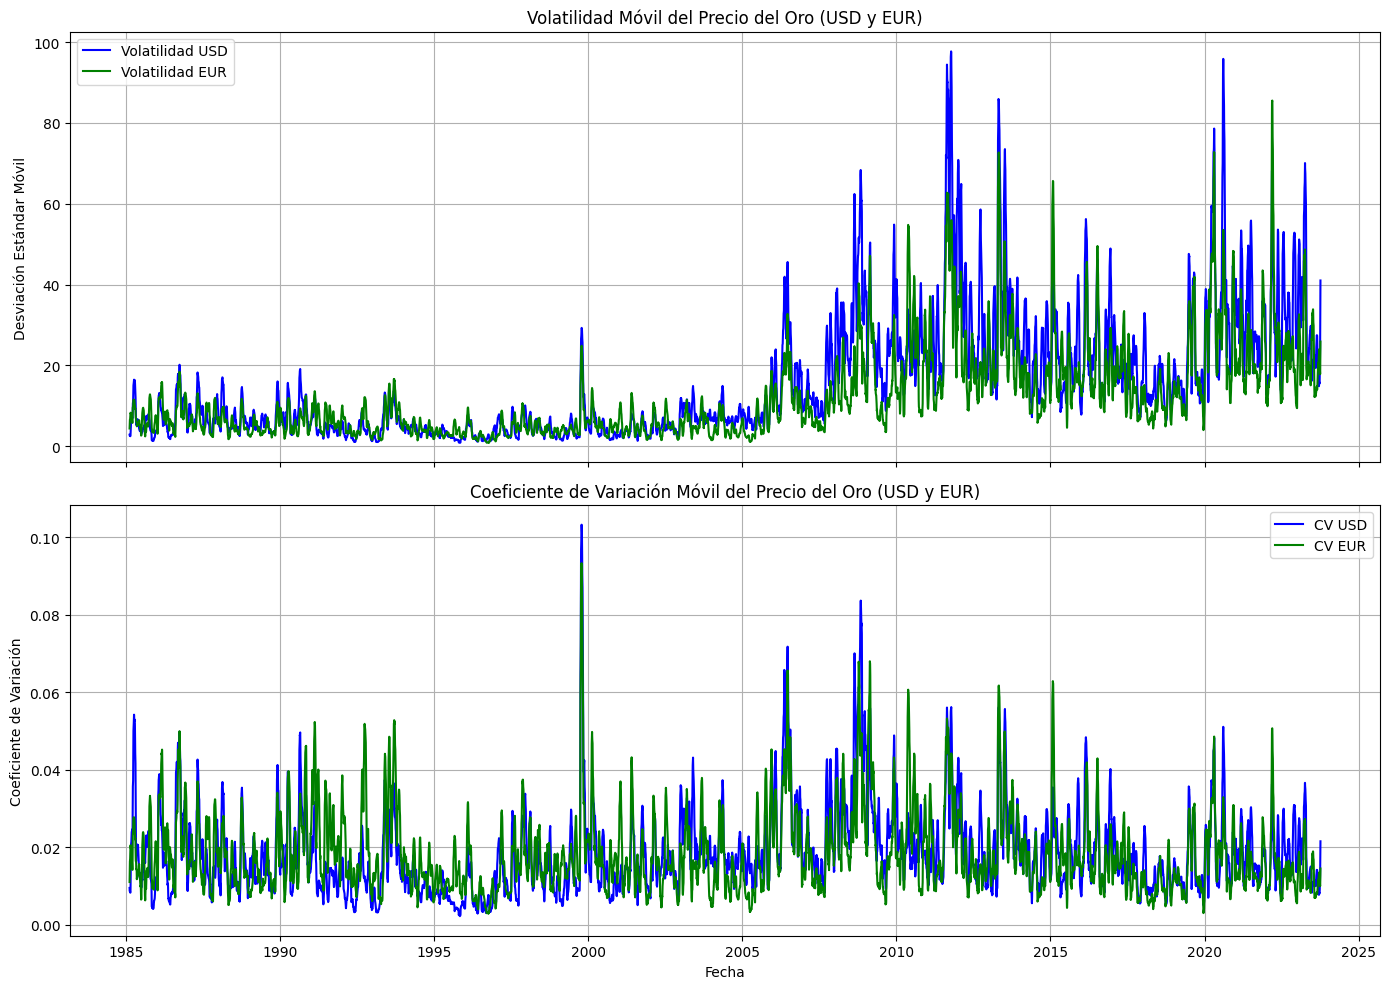

In [10]:
# Crear un nuevo DataFrame para los cálculos de volatilidad y coeficiente de variación
volatility_data = daily_data_op[['Date', 'USD', 'EUR']].copy()

# Calcular la desviación estándar móvil para USD y EUR con una ventana de 30 días
volatility_data['USD_volatility'] = daily_data_op['USD'].rolling(window=30).std()
volatility_data['EUR_volatility'] = daily_data_op['EUR'].rolling(window=30).std()

# Calcular el coeficiente de variación móvil para USD y EUR (Desviación estándar / Media) con una ventana de 30 días
volatility_data['USD_cv'] = volatility_data['USD_volatility'] / daily_data_op['USD'].rolling(window=30).mean()
volatility_data['EUR_cv'] = volatility_data['EUR_volatility'] / daily_data_op['EUR'].rolling(window=30).mean()

# Graficar la volatilidad y el coeficiente de variación asegurándose de que 'Date' esté presente
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Gráfica de volatilidad
ax[0].plot(volatility_data['Date'], volatility_data['USD_volatility'], label='Volatilidad USD', color='blue')
ax[0].plot(volatility_data['Date'], volatility_data['EUR_volatility'], label='Volatilidad EUR', color='green')
ax[0].set_ylabel('Desviación Estándar Móvil')
ax[0].set_title('Volatilidad Móvil del Precio del Oro (USD y EUR)')
ax[0].legend()
ax[0].grid(True)

# Gráfica del coeficiente de variación
ax[1].plot(volatility_data['Date'], volatility_data['USD_cv'], label='CV USD', color='blue')
ax[1].plot(volatility_data['Date'], volatility_data['EUR_cv'], label='CV EUR', color='green')
ax[1].set_xlabel('Fecha')
ax[1].set_ylabel('Coeficiente de Variación')
ax[1].set_title('Coeficiente de Variación Móvil del Precio del Oro (USD y EUR)')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()


### Interpretacion de Volatilidad y Variabilidad del Precio del Oro


#### Volatilidad Móvil
- La **volatilidad** del precio del oro en USD y EUR muestra un patrón muy similar a lo largo del tiempo. A partir del año **2005**, se observa un incremento significativo en la volatilidad, con **picos notorios** que coinciden con eventos económicos importantes, como la **crisis financiera global de 2008** y la **pandemia de COVID-19 en 2020**.
- Las gráficas de volatilidad muestran cómo el comportamiento de ambas divisas se mantiene alineado, con variaciones que sugieren una respuesta conjunta a eventos macroeconómicos. Esto refuerza la idea de que estas dos divisas representan adecuadamente el comportamiento global del precio del oro.

#### Coeficiente de Variación Móvil (CV)
- El **coeficiente de variación móvil** indica que la variabilidad relativa del precio del oro también presenta **picos** en los mismos períodos mencionados anteriormente. 
- Durante la crisis de 2008 y la pandemia de 2020, se notan aumentos significativos en el CV, lo cual sugiere que el nivel de incertidumbre y la volatilidad aumentaron considerablemente durante estos períodos.
- En general, el comportamiento del **CV** refuerza la **correlación alta** entre las series de USD y EUR, y sugiere que la variabilidad del oro se comporta de forma similar en ambas divisas.

#### Conclusiones del Análisis de Volatilidad y Variabilidad
- Tanto el análisis de **volatilidad móvil** como el del **coeficiente de variación** muestran que el precio del oro presenta **altos niveles de volatilidad** en períodos de incertidumbre económica.
- La **similitud** entre los patrones observados en **USD** y **EUR** confirma que estos representan de manera adecuada la dinámica del oro.

## Conclusiones Finales del Análisis Exploratorio de Datos (EDA)

Después de realizar un exhaustivo **Análisis Exploratorio de Datos (EDA)** de los precios del oro en **USD** y **EUR** se llego a las siguientes conclusiones:

#### 1. Reducción del Número de Divisas
El análisis permitió justificar la reducción del número de divisas a estudiar en el modelo a **solo dos monedas (USD y EUR)**, debido a la **alta correlación** entre las divisas evaluadas y la **representatividad** que estas dos monedas aportan al análisis. Se comprobó que trabajar con USD y EUR es suficiente para mantener la precisión del modelo sin introducir redundancia.

#### 2. Tendencia y Estacionalidad
La **descomposición STL** de las series de tiempo mostró que la **tendencia** tiene un rol predominante en el comportamiento de los precios del oro. Se observó un incremento significativo en períodos de crisis, como la crisis financiera de 2008 y la pandemia de 2020, donde el oro actuó como activo refugio. La **estacionalidad**, por otro lado, tiene un impacto moderado, sin patrones cíclicos fuertes.

#### 3. Volatilidad y Variabilidad
El análisis de la **volatilidad móvil** y el **coeficiente de variación móvil** reveló que el oro tiene períodos de alta volatilidad, coincidiendo con momentos de alta incertidumbre económica. Estos picos de volatilidad reflejan la sensibilidad del mercado del oro frente a crisis globales, lo cual debe ser tomado en cuenta para la modelación.

#### 4. No Estacionariedad de las Series
Las pruebas de **ADF y KPSS** indicaron que ambas series (USD y EUR) no son **estacionarias**, lo cual es esencial para la modelación de series de tiempo. Esto implica la necesidad de **diferenciar las series** para poder trabajar con modelos que requieran estacionariedad, como ARIMA.

#### 5. Dependencia Temporal (Autocorrelación)
La **ACF** y **PACF** mostraron una alta dependencia temporal en las series de precios del oro. Esta información será fundamental para la selección y parametrización de los modelos de predicción, indicando la importancia de los valores pasados en la proyección futura de precios.

### Comentarios Finales
Atraves del EDA se pudo observar que  el precio del oro tiene una fuerte **tendencia creciente** que se intensifica en períodos de crisis, con una **estacionalidad moderada** y una notable **volatilidad** en momentos críticos. La **no estacionariedad** requiere una transformación de las series antes de proceder a la modelación.
A partir de esto,se debera considerar **transformar las series** para garantizar estacionariedad lo que permitira implementar modelos de series de tiempo que nesesiten estas carateristicas.